## Data Preparation

Before analysis, the data must be checked for missing values, duplicates, and consistency in column names and data types. This ensures the reliability of subsequent analysis.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
# Set the path to the folder containing the sales CSV files
path = "c:\\Users\\acer\\OneDrive\\Desktop\\Sales Files-20250609T090810Z-1-001\\Sales Files"

In [3]:
# List all CSV files in the directory
fileList = []
for i in os.listdir(path):
    if i.endswith('.csv'):
        fileList.append(i)
fileList

['Combined_Files.csv',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
# Combine all CSV files into a single DataFrame
all_data = pd.DataFrame()
for i in fileList:
    all_data = pd.concat([all_data, pd.read_csv(path + '\\' + i)])
all_data.reset_index(drop=True, inplace=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
# Save combined data for backup (optional)
all_data.to_csv("Combined_Files.csv", index=False)

In [6]:
# Check data info and missing values
all_data.info()
print('Missing values per column:')
print(all_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121100 entries, 0 to 1121099
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Order ID          1115700 non-null  float64
 1   Product           1115700 non-null  object 
 2   Quantity Ordered  1115700 non-null  float64
 3   Price Each        1115700 non-null  float64
 4   Order Date        1115700 non-null  object 
 5   Purchase Address  1115700 non-null  object 
dtypes: float64(3), object(3)
memory usage: 51.3+ MB
Missing values per column:
Order ID            5400
Product             5400
Quantity Ordered    5400
Price Each          5400
Order Date          5400
Purchase Address    5400
dtype: int64


In [7]:
# Drop rows with missing values
all_data = all_data.dropna()
all_data.reset_index(drop=True, inplace=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
# Convert columns to appropriate data types
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
1115695,259353.0,AAA Batteries (4-pack),3.0,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001"
1115696,259354.0,iPhone,1.0,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
1115697,259355.0,iPhone,1.0,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016"
1115698,259356.0,34in Ultrawide Monitor,1.0,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016"


In [9]:
# Extract month from 'Order Date' and add as a new column
all_data['Month'] = all_data['Order Date'].str.split('/').str[0].astype(int)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4
1,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
1115695,259353.0,AAA Batteries (4-pack),3.0,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001",9
1115696,259354.0,iPhone,1.0,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016",9
1115697,259355.0,iPhone,1.0,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016",9
1115698,259356.0,34in Ultrawide Monitor,1.0,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016",9


In [10]:
# Extract city from 'Purchase Address' and add as a new column
all_data['City'] = all_data['Purchase Address'].str.split(',').str[1].str.strip()
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,Dallas
1,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston
2,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
3,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles
...,...,...,...,...,...,...,...,...
1115695,259353.0,AAA Batteries (4-pack),3.0,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles
1115696,259354.0,iPhone,1.0,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco
1115697,259355.0,iPhone,1.0,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016",9,San Francisco
1115698,259356.0,34in Ultrawide Monitor,1.0,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco


## Exploratory Data Analysis (EDA)

This section explores the dataset using descriptive statistics and visualizations to identify trends and patterns in sales.

In [11]:
# Add a 'Sales' column for total sales per order
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,Dallas,23.90
1,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,99.99
2,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.00
3,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.99
4,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.99
...,...,...,...,...,...,...,...,...,...
1115695,259353.0,AAA Batteries (4-pack),3.0,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,8.97
1115696,259354.0,iPhone,1.0,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,700.00
1115697,259355.0,iPhone,1.0,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016",9,San Francisco,700.00
1115698,259356.0,34in Ultrawide Monitor,1.0,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco,379.99


In [12]:
# Descriptive statistics for sales and quantity
print('Price Each:')
print('Sum:', all_data['Sales'].sum())
print('Mean:', all_data['Sales'].mean())
print('Standard Deviation:', all_data['Sales'].std())
print('Skewness:', all_data['Sales'].skew())
print('Kurtosis:', all_data['Sales'].kurtosis())
print('\nQuantity Ordered Statistics:')
print('Sum:', all_data['Quantity Ordered'].sum())
print('Mean:', all_data['Quantity Ordered'].mean())
print('Standard Deviation:', all_data['Quantity Ordered'].std())
print('Skewness:', all_data['Quantity Ordered'].skew())
print('Kurtosis:', all_data['Quantity Ordered'].kurtosis())

Price Each:
Sum: 206952215.81999993
Mean: 185.49091675181495
Standard Deviation: 332.9190253964222
Skewness: 2.881893295910044
Kurtosis: 9.22684142035775

Quantity Ordered Statistics:
Sum: 1254474.0
Mean: 1.1243828986286637
Standard Deviation: 0.4427916318409917
Skewness: 4.833131682773529
Kurtosis: 31.81974901819884


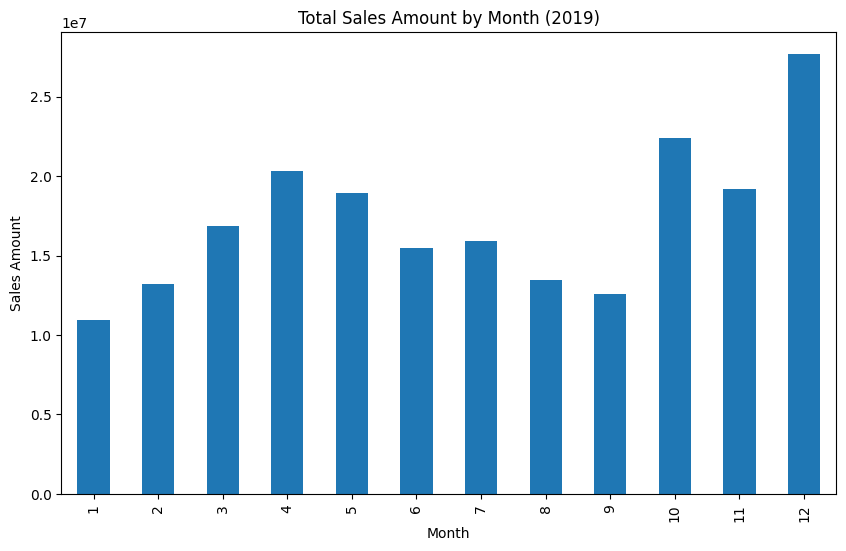

In [13]:
# Visualize monthly sales trends
monthly_sales = all_data.groupby('Month')['Sales'].sum()
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='bar')
plt.title('Total Sales Amount by Month (2019)')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.show()

Product
Macbook Pro Laptop            48225600.00
iPhone                        28765800.00
ThinkPad Laptop               24779752.20
Google Phone                  19915200.00
27in 4K Gaming Monitor        14610585.36
34in Ultrawide Monitor        14133348.06
Apple Airpods Headphones      14094900.00
Flatscreen TV                  8674200.00
Bose SoundSport Headphones     8073392.58
27in FHD Monitor               6794547.00
Name: Sales, dtype: float64


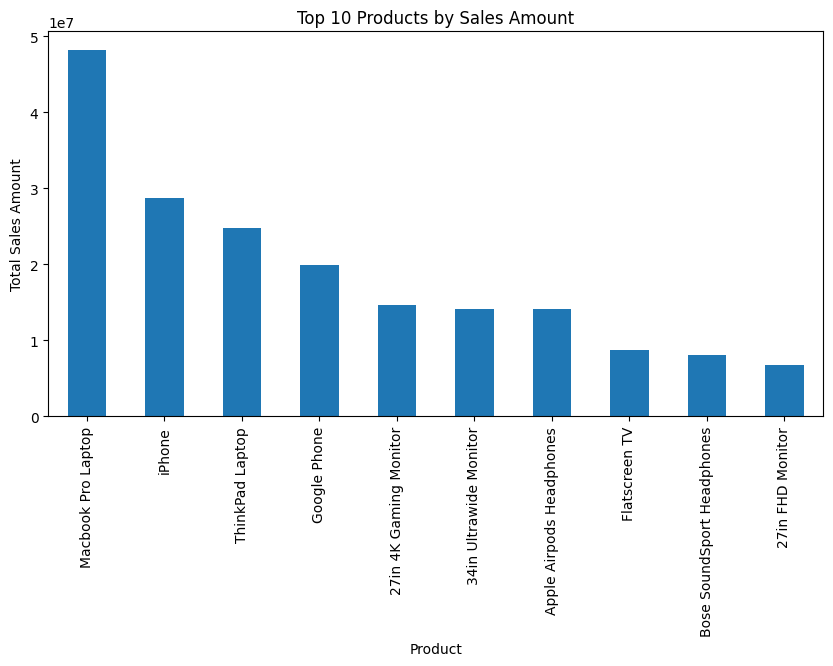

In [14]:
# Top 10 products by total sales amount
if 'Product' in all_data.columns:
    top_products = all_data.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)
    print(top_products)
    top_products.plot(kind='bar', figsize=(10,5), title='Top 10 Products by Sales Amount')
    plt.ylabel('Total Sales Amount')
    plt.show()

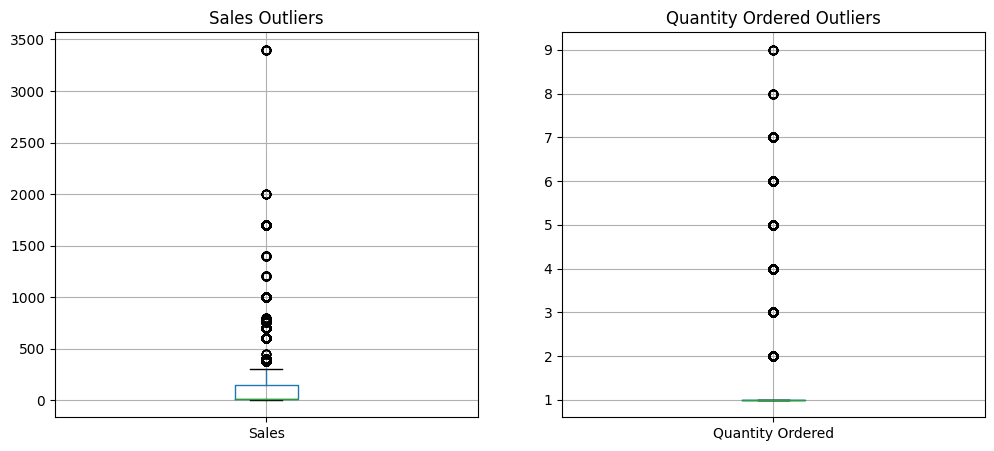

In [15]:
# Boxplots for outlier detection
fig, axes = plt.subplots(1, 2, figsize=(12,5))
all_data.boxplot(column='Sales', ax=axes[0])
axes[0].set_title('Sales Outliers')
all_data.boxplot(column='Quantity Ordered', ax=axes[1])
axes[1].set_title('Quantity Ordered Outliers')
plt.show()

Correlation between Sales and Quantity Ordered: -0.14


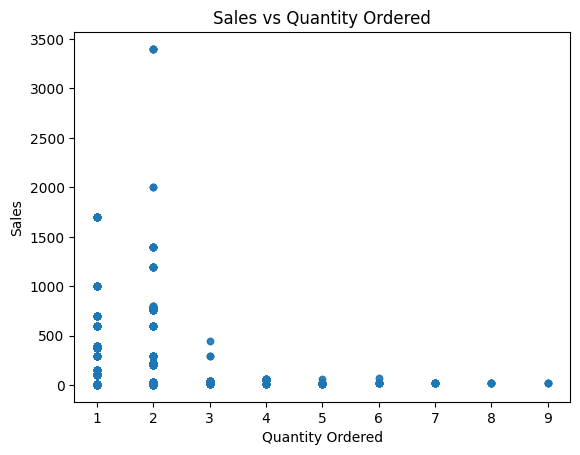

In [16]:
# Correlation and scatter plot
corr = all_data['Sales'].corr(all_data['Quantity Ordered'])
print(f'Correlation between Sales and Quantity Ordered: {corr:.2f}')
all_data.plot.scatter(x='Quantity Ordered', y='Sales', alpha=0.3, title='Sales vs Quantity Ordered')
plt.show()

## Simple Forecasting Example

To illustrate forecasting, we'll use a moving average to predict next month's sales. This is a basic approach, but it provides a starting point for more advanced models.

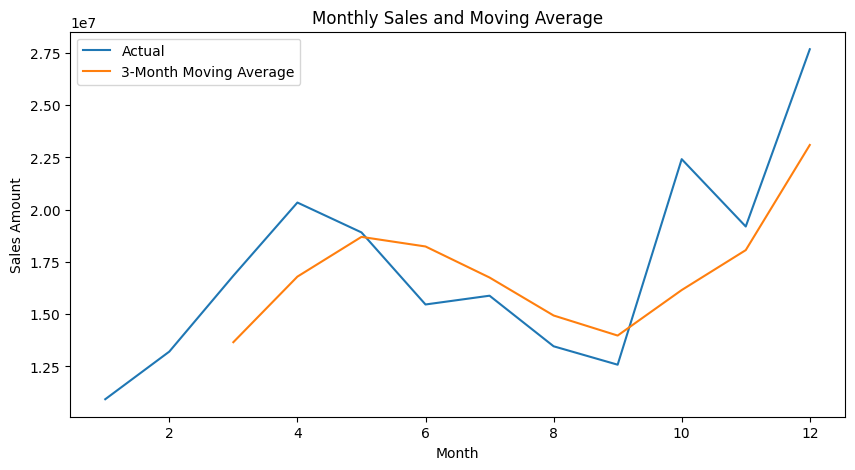

Forecast for next month (using 3-month moving average): 23099546.84


In [17]:
# Moving average forecast for next month
ma = monthly_sales.rolling(window=3).mean()
plt.figure(figsize=(10,5))
monthly_sales.plot(label='Actual')
ma.plot(label='3-Month Moving Average')
plt.title('Monthly Sales and Moving Average')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()
forecast = ma.iloc[-1]
print(f'Forecast for next month (using 3-month moving average): {forecast:.2f}')